In [1]:
import os
import re
import numpy as np
from scipy.signal import deconvolve
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
%matplotlib widget

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

In [2]:
def get_bin(folder,KID,Pread,T,strm):
    if type(strm) != str:
        return np.fromfile(folder+ f"KID{KID}_{Pread}dBm__TDvis{int(strm)}_TmK{T}.bin", dtype='>f8').reshape(-1,2)
    else:
        return np.fromfile(folder+ f"KID{KID}_{Pread}dBm__TD{strm}_TmK{T}.bin", dtype='>f8').reshape(-1,2)

def norm_radius(data):
    radii = np.sqrt(data[:,0]**2+data[:,1]**2)
    return data/np.mean(radii)

def to_ampphase(data):
    ndata = norm_radius(data)
    Amp = np.sqrt(ndata[:,0]**2+ndata[:,1]**2)
    Phase = np.pi - (np.arctan2(ndata[:,1],ndata[:,0])%(2*np.pi)) 
    return Amp,Phase

def to_RX(data):
    ndata = norm_radius(data)
    g = ndata[:,0] + 1j*ndata[:,1]
    z=(1+g)/(1-g)
    return z.real, z.imag

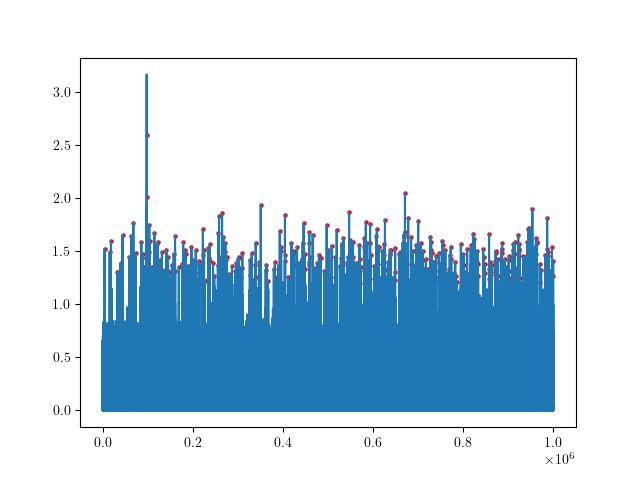

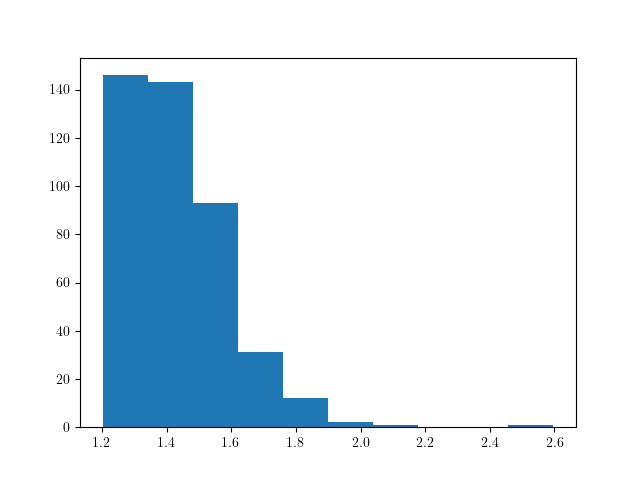

Average peak height is 1.426841484129532
Average peak height is 1.450946847177912
Average peak height is 1.4171708301619537
Average peak height is 1.438920499811106
Average peak height is 1.4379318084198762
Average peak height is 1.4318807600633252
Average peak height is 1.4408063446396477
Average peak height is 1.4120228127861625
Average peak height is 1.4231203678742803
Average peak height is 1.440184612913819


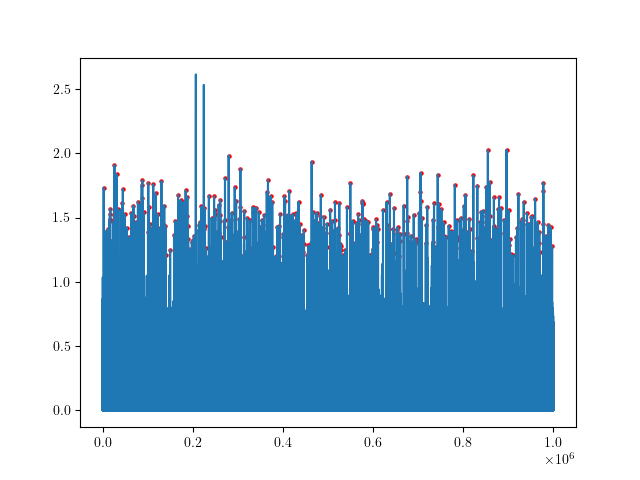

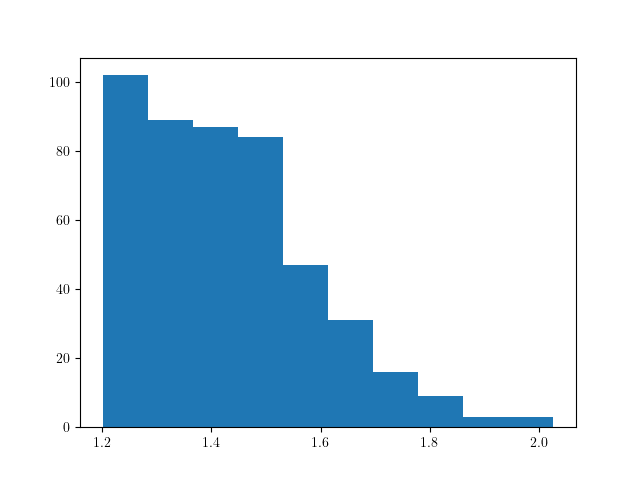

Average peak height is 1.4283344467489765
Average peak height is 1.423569012031407
Average peak height is 1.4244551693543797
Average peak height is 1.4306052649690406
Average peak height is 1.4355563094065305
Average peak height is 1.443560296333946
Average peak height is 1.4478707729042553
Average peak height is 1.4298514982472097
Average peak height is 1.4259493912193304
Average peak height is 1.4446471314607923


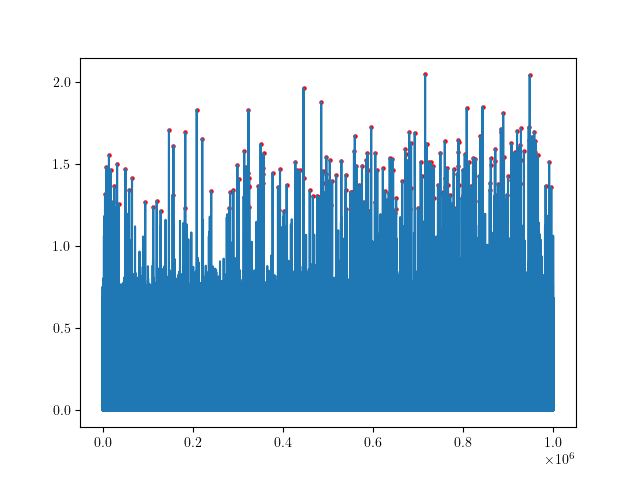

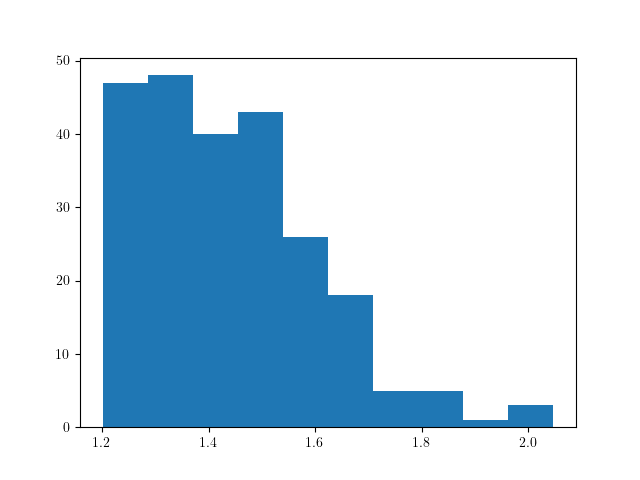

Average peak height is 1.4378206255357637
Average peak height is 1.417606454804238
Average peak height is 1.4415793746766352
Average peak height is 1.4229081032083046
Average peak height is 1.4274698359877678
Average peak height is 1.4388003149898674
Average peak height is 1.4301659299933553
Average peak height is 1.425199000471688
Average peak height is 1.4097418999190843
Average peak height is 1.4326655061329028


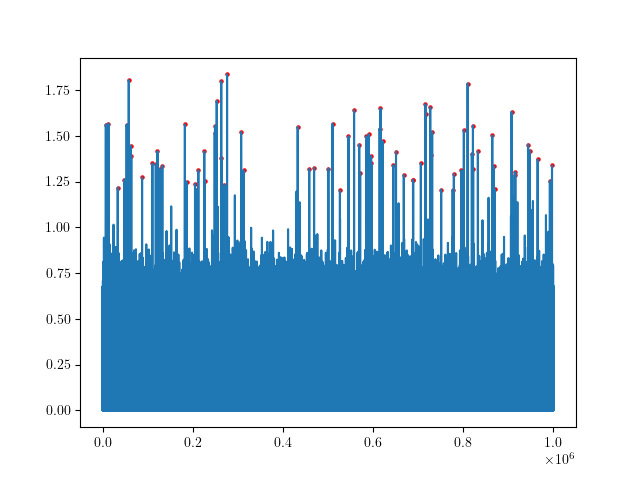

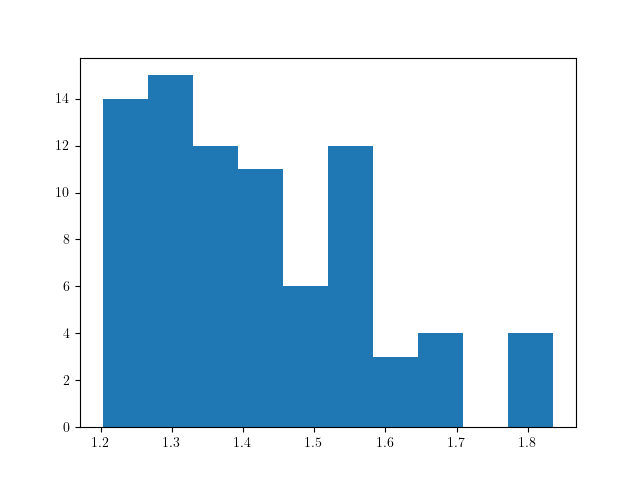

Average peak height is 1.421113702454119
Average peak height is 1.4139889713886529
Average peak height is 1.4329073089757995
Average peak height is 1.43030118567741
Average peak height is 1.438950853553418
Average peak height is 1.4370584895278238
Average peak height is 1.422920406089894
Average peak height is 1.4312165600388207
Average peak height is 1.438578304511238
Average peak height is 1.4360866935886039


In [3]:
KID = 337
Pread = 98
Temp = 100
streams=40
dt_in_us=0.25
Q = 15580.743306
F0_in_recip_us = 6.275222 * 1e3

allheightlist = []
for i in range(streams):
    testdata = get_bin('../DataKian/bTa_LT342Chip1/6KIDs_2Pread_673nm_160nW_31dB_4Msample/TD_Power/',KID,Pread,Temp,i)
    _,Phase = to_ampphase(testdata)
    t=np.arange(len(Phase))*dt_in_us
    tau_ringing = Q/(np.pi*F0_in_recip_us)
    indices,_ = find_peaks(Phase,prominence=[0.5,1.5],distance=50)
    heights = np.zeros(len(indices))
    for n,ind in enumerate(indices):
        step = tau_ringing*5/dt_in_us
        indmin = np.max(0,int(ind-step))
        indmax = np.min(len(Phase)-1,int(ind+step))
        phasecut = Phase[indmin,indmax]
        tcut = np.arange(len(phasecut))*dt_in_us
        ringing = np.exp(-tcut/tau_ringing)
        ringing /= np.sum(ringing)
        phasecut = deconvolve(np.pad(phasecut,(0,len(tcut)-1),constant_values=0),ringing)[0]
        heights[n]=np.max(phasecut)

    heights = Phase[indices]
    allheightlist += list(heights)
    if i % 10 == 0:
        plt.figure()
        plt.plot(t,Phase)
        plt.scatter(t[indices],Phase[indices],s=5,color='r')
        plt.show()
        plt.figure()
        plt.hist(heights)
        plt.show()
    print(f'Average peak height is {np.mean(heights)}')

In [4]:
print(np.mean(np.array(allheightlist)))

1.4322571587573598
